## Решение kaggle соревнования Binary Prediction of Poisonous Mushrooms

### Библиотеки

In [ ]:
import pandas as pd



In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 8.3 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=00cfc32d47909c56468f83ed17a7062955f472984a2e99e24f1c6d5bdb63e9a7
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=208041b09209c6d342455c6cbe60f110b7f60fcf261e80a3bec6b461371e3c87
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
!pip install MissForest

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from fancyimpute import IterativeImputer
from typing import List
from missforest import MissForest

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)

(3116945, 22) (2077964, 21)


In [ ]:
df_train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [ ]:
numeric = ['cap-diameter', 'stem-height', 'stem-width']

			 Train
3913


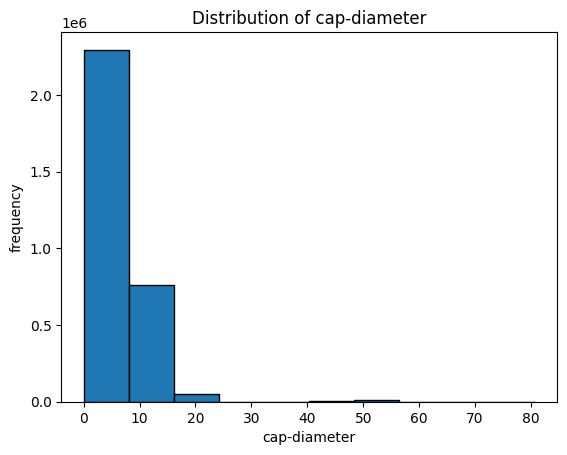

2749


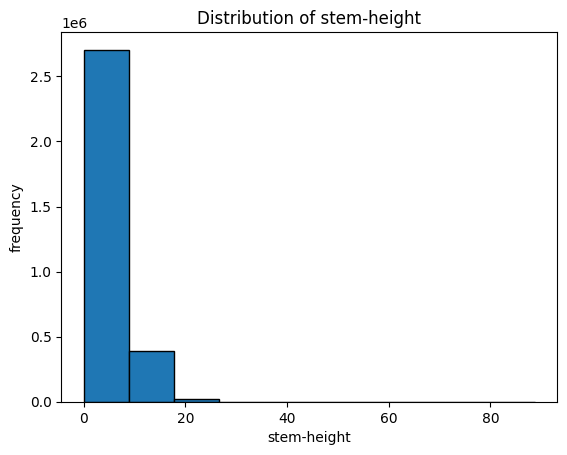

5836


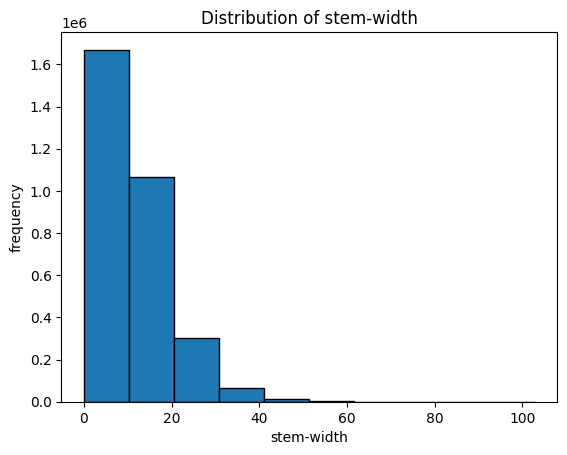

			 Test
3745


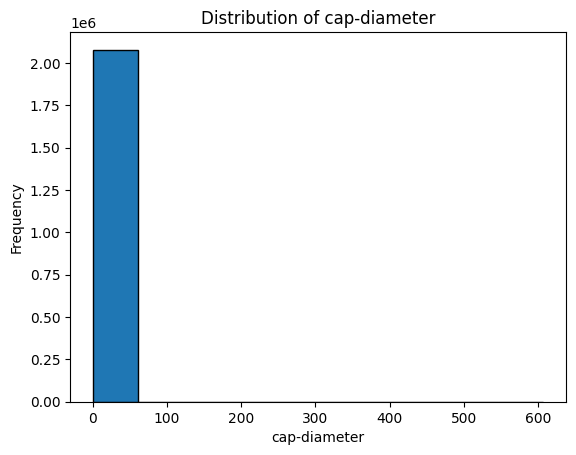

2664


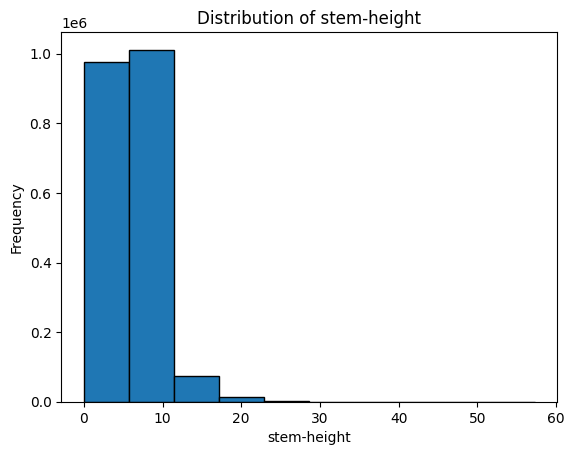

5610


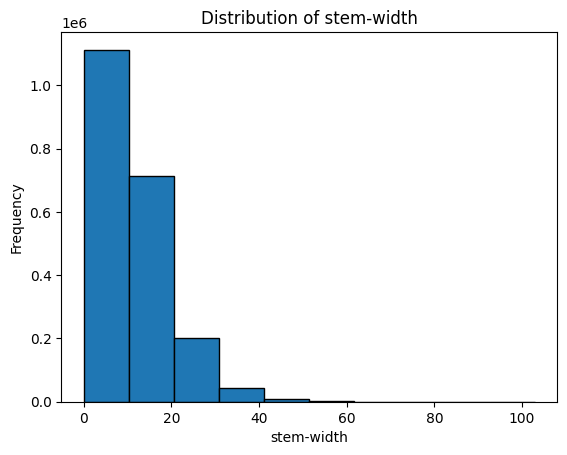

In [ ]:
print('\t\t\t Train')
for col in numeric:
    print(df_train[col].nunique())
    plt.hist(df_train[col], bins = 10, edgecolor = 'black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()
print('\t\t\t Test')
for col in numeric:
    print(df_test[col].nunique())
    plt.hist(df_test[col], bins = 10, edgecolor = 'black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df_train = df_train.drop('id', axis = 1)
df_test = df_test.drop('id', axis = 1)
print(df_train.columns, df_test.columns)

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object') Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')


In [ ]:
categorical = []
for col in df_train.columns:
    if col not in numeric:
        categorical.append(col)
for col in categorical:
    print(f'\t\t\t {col}')
    print(df_train[col].value_counts())

			 class
class
p    1705396
e    1411549
Name: count, dtype: int64
			 cap-shape
cap-shape
x        1436026
f         676238
s         365146
b         318646
o         108835
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 74, dtype: int64
			 cap-surface
cap-surface
t        460777
s        384970
y        327826
h        284460
g        263729
          ...  
1.42          1
has h         1
10.83         1
8.96          1
0.87          1
Name: count, Length: 83, dtype: int64
			 cap-color
cap-color
n             1359542
y              386627
w              379442
g              210825
e              197290
               ...   
3.95                1
6.59                1
5.25                1
veil-color          1
9.02                1
Name: count, Length: 78, dtype: int64
			 does-bruise-or-bleed
does-bruise-or-bleed
f           2569743
t            547085
w                14
c                11
h          

In [ ]:
for col in categorical:
    if col!='class':
        print(f'\t\t\t{col}')
        print(df_test[col].value_counts())

			cap-shape
cap-shape
x       957949
f       452360
s       242698
b       211879
o        71972
         ...  
5.59         1
4.41         1
3.73         1
3.47         1
4.54         1
Name: count, Length: 62, dtype: int64
			cap-surface
cap-surface
t                    306852
s                    257190
y                    218336
h                    189737
g                    176140
d                    137675
k                     86041
e                     79918
i                     75570
w                     73109
l                     30101
f                        54
n                        50
p                        44
o                        37
a                        28
x                        27
m                        25
r                        25
u                        21
c                        19
b                        14
z                         6
spore-print-color         3
season                    3
does None                 2
0.94               

## Практически у всех объектов есть малозначимые категории и явные вбросы

In [ ]:
for col in categorical:
    print(col, df_train[col].nunique())

class 2
cap-shape 74
cap-surface 83
cap-color 78
does-bruise-or-bleed 26
gill-attachment 78
gill-spacing 48
gill-color 63
stem-root 38
stem-surface 60
stem-color 59
veil-type 22
veil-color 24
has-ring 23
ring-type 40
spore-print-color 32
habitat 52
season 4


In [ ]:
for col in categorical:
    df_train[col] = df_train[col].astype(str)
    print(df_train[col].isna().sum())
    for feature in df_train[col].unique():
        if (df_train[col] == feature).sum() < 1000 and feature!='nan':
            df_train[df_train[col] == feature] = 'other'
    print(col, df_train[col].nunique(), df_train[col].unique(), '\n')
df_train.to_csv('train_cat_fixed.csv', index = False)

0
class 2 ['e' 'p'] 

0


<ipython-input-65-a4dd0e55aa45>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train[df_train[col] == feature] = 'other'


cap-shape 9 ['f' 'x' 'p' 'b' 'o' 'c' 's' 'other' 'nan'] 

0
cap-surface 13 ['s' 'h' 'y' 'l' 't' 'e' 'g' 'nan' 'd' 'i' 'w' 'k' 'other'] 

0
cap-color 14 ['u' 'o' 'b' 'g' 'w' 'n' 'e' 'y' 'r' 'p' 'k' 'l' 'other' 'nan'] 

0
does-bruise-or-bleed 4 ['f' 't' 'other' 'nan'] 

0
gill-attachment 9 ['a' 'x' 's' 'd' 'e' 'nan' 'f' 'p' 'other'] 

0
gill-spacing 5 ['c' 'nan' 'd' 'f' 'other'] 

0
gill-color 14 ['w' 'n' 'g' 'k' 'y' 'f' 'p' 'o' 'b' 'u' 'e' 'r' 'other' 'nan'] 

0
stem-root 6 ['nan' 'b' 'c' 'r' 's' 'other'] 

0
stem-surface 9 ['nan' 'y' 's' 't' 'g' 'h' 'k' 'i' 'other'] 

0
stem-color 14 ['w' 'o' 'n' 'y' 'e' 'u' 'p' 'other' 'g' 'r' 'k' 'l' 'b' 'nan'] 

0
veil-type 3 ['nan' 'u' 'other'] 

0
veil-color 8 ['nan' 'n' 'w' 'other' 'k' 'y' 'e' 'u'] 

0
has-ring 4 ['f' 't' 'other' 'nan'] 

0
ring-type 10 ['f' 'z' 'e' 'nan' 'p' 'l' 'g' 'other' 'r' 'm'] 

0
spore-print-color 9 ['nan' 'k' 'w' 'p' 'other' 'n' 'r' 'u' 'g'] 

0
habitat 10 ['d' 'l' 'g' 'h' 'p' 'm' 'other' 'u' 'w' 'nan'] 

0
season 5 ['a'

In [ ]:
df_train.head(10)

In [ ]:
for col in categorical:
    df_train[col] = df_train[col].replace('nan', np.nan)
    print(df_train[col].isna().sum())

In [ ]:
for col in categorical:
    if col!='class':
        df_test[col] = df_test[col].astype(str)
        for feature in df_test[col].unique():
            if (df_test[col] == feature).sum() < 1000:
                df_test[df_test[col] == feature] = 'other'
        print(col, df_test[col].nunique(), df_test[col].unique(), '\n')
df_train.to_csv('test_cat_fixed.csv', index = False)

<ipython-input-70-e40ca1f111c0>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test[df_test[col] == feature] = 'other'


cap-shape 8 ['x' 'o' 'b' 'f' 's' 'p' 'c' 'other'] 

cap-surface 13 ['nan' 't' 'g' 'h' 'd' 'e' 'y' 'k' 's' 'i' 'l' 'w' 'other'] 

cap-color 13 ['n' 'o' 'y' 'k' 'b' 'w' 'e' 'g' 'p' 'u' 'l' 'r' 'other'] 

does-bruise-or-bleed 3 ['t' 'f' 'other'] 

gill-attachment 9 ['nan' 's' 'p' 'x' 'f' 'a' 'd' 'e' 'other'] 

gill-spacing 5 ['nan' 'c' 'f' 'd' 'other'] 

gill-color 13 ['w' 'y' 'n' 'e' 'f' 'b' 'g' 'p' 'o' 'u' 'k' 'r' 'other'] 

stem-root 6 ['b' 'nan' 's' 'r' 'c' 'other'] 

stem-surface 9 ['nan' 's' 'g' 'y' 't' 'i' 'k' 'h' 'other'] 

stem-color 13 ['w' 'n' 'y' 'g' 'o' 'p' 'u' 'e' 'k' 'r' 'other' 'l' 'b'] 

veil-type 3 ['u' 'nan' 'other'] 

veil-color 8 ['w' 'nan' 'n' 'y' 'e' 'u' 'k' 'other'] 

has-ring 3 ['t' 'f' 'other'] 

ring-type 10 ['g' 'f' 'z' 'nan' 'r' 'e' 'l' 'p' 'other' 'm'] 

spore-print-color 9 ['nan' 'p' 'k' 'w' 'n' 'r' 'other' 'g' 'u'] 

habitat 9 ['d' 'p' 'u' 'g' 'h' 'm' 'l' 'w' 'other'] 

season 5 ['a' 's' 'u' 'w' 'other'] 



In [ ]:
for col in categorical:
    print(col, set(df_train[col].unique()) == set(df_train[col].unique()))

class True
cap-shape True
cap-surface True
cap-color True
does-bruise-or-bleed True
gill-attachment True
gill-spacing True
gill-color True
stem-root True
stem-surface True
stem-color True
veil-type True
veil-color True
has-ring True
ring-type True
spore-print-color True
habitat True
season True


In [ ]:
for col in categorical:
        if col!='class':
            df_test[col] = df_test[col].replace('nan', np.nan)
            print(df_test[col].isna().sum())

0
446309
0
0
349223
838233
0
1835230
1319500
0
1968060
1822977
0
86053
1896497
0
0


In [ ]:
df_train.to_csv(
    'train_cat_fixed_before_nan.csv'
)
df_test.to_csv(
    'test_cat_fixed_before_nan.csv'
)

In [ ]:
df_train = pd.read_csv('train_cat_fixed_before_nan.csv')
df_test = pd.read_csv('test_cat_fixed_before_nan.csv')
print(df_train.shape, df_test.shape)

(80121, 22) (83293, 21)


In [ ]:
for col in df_train.columns:
    if df_train[col].isna().mean()*100 > 2:
        print(col, df_train[col].isna().sum(), "\t\n", df_train[col].isna().mean()*100)

cap-surface 670229 	
 21.502753497414936
gill-attachment 523039 	
 16.78050142046138
gill-spacing 1256520 	
 40.31254962792093
stem-root 2753001 	
 88.32369515663574
stem-surface 1978074 	
 63.461947515917025
veil-type 2952397 	
 94.72085647966198
veil-color 2736282 	
 87.78730455622411
ring-type 128689 	
 4.128690111631742
spore-print-color 2845121 	
 91.27915314514694


## feature importance

In [ ]:
for col in categorical:
    if col!='class':
        df_train[col] = df_train[col].replace('other', 'X')
        df_test[col] = df_test[col].replace('other', 'X')
        print(col, '\n', df_train[col].unique(), '\n', df_test[col].unique())

cap-shape 
 ['f' 'x' 'p' 'b' 'o' 'c' 's' 'X' nan] 
 ['x' 'o' 'b' 'f' 's' 'p' 'c' 'X']
cap-surface 
 ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' 'X'] 
 [nan 't' 'g' 'h' 'd' 'e' 'y' 'k' 's' 'i' 'l' 'w' 'X']
cap-color 
 ['u' 'o' 'b' 'g' 'w' 'n' 'e' 'y' 'r' 'p' 'k' 'X' 'l' nan] 
 ['n' 'o' 'y' 'k' 'b' 'w' 'e' 'g' 'p' 'u' 'l' 'r' 'X']
does-bruise-or-bleed 
 ['f' 't' 'X' nan] 
 ['t' 'f' 'X']
gill-attachment 
 ['a' 'x' 's' 'd' 'e' nan 'f' 'p' 'X'] 
 [nan 's' 'p' 'x' 'f' 'a' 'd' 'e' 'X']
gill-spacing 
 ['c' nan 'd' 'f' 'X'] 
 [nan 'c' 'f' 'd' 'X']
gill-color 
 ['w' 'n' 'g' 'k' 'y' 'f' 'p' 'o' 'b' 'u' 'X' 'e' 'r' nan] 
 ['w' 'y' 'n' 'e' 'f' 'b' 'g' 'p' 'o' 'u' 'k' 'r' 'X']
stem-root 
 [nan 'b' 'c' 'r' 's' 'X'] 
 ['b' nan 's' 'r' 'c' 'X']
stem-surface 
 [nan 'y' 's' 't' 'g' 'h' 'k' 'i' 'X'] 
 [nan 's' 'g' 'y' 't' 'i' 'k' 'h' 'X']
stem-color 
 ['w' 'o' 'n' 'y' 'e' 'u' 'p' 'X' 'g' 'r' 'k' 'l' 'b' nan] 
 ['w' 'n' 'y' 'g' 'o' 'p' 'u' 'e' 'k' 'r' 'X' 'l' 'b']
veil-type 
 [nan 'u' 'X'] 
 ['u' nan 

In [ ]:
for col in categorical:
    if col!='class':
        df_train[col] = df_train[col].replace('X', 'R')
        df_test[col] = df_test[col].replace('X', 'R')

In [ ]:
print(df_train['class'].unique())
df_train = df_train[df_train['class'] != 'other']
df_train['class'].unique()

['e' 'p' 'other']


array(['e', 'p'], dtype=object)

In [ ]:
temp_df = df_train.drop('class', axis = 1)
temp_target = df_train['class']
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(temp_df, temp_target, test_size=0.3, random_state=42)

In [ ]:
print(temp_df.shape, temp_target.shape)
print(temp_X_train.shape, temp_y_train.shape)

(3111485, 20) (3111485,)
(2178039, 20) (2178039,)


In [ ]:
for col in temp_X_train.columns:
    print(col, temp_X_train[col].unique())
print(temp_y_train.unique())

cap-diameter [17.21 3.04 3.2 ... 45.07 52.5 42.13]
cap-shape ['f' 'b' 's' 'x' 'o' 'p' 'c' nan]
cap-surface ['g' 'y' nan 'd' 'e' 't' 'h' 's' 'i' 'w' 'k' 'l']
cap-color ['o' 'y' 'w' 'n' 'b' 'l' 'u' 'g' 'e' 'k' 'r' 'p' nan]
does-bruise-or-bleed ['f' 't' nan]
gill-attachment ['p' nan 'x' 'd' 's' 'a' 'f' 'e']
gill-spacing [nan 'c' 'd' 'f']
gill-color ['y' 'n' 'p' 'b' 'u' 'w' 'o' 'g' 'e' 'r' 'k' 'f' nan]
stem-height [4.95 6.96 8.23 ... 31.07 27.69 34.61]
stem-width [31.84 3.36 3.95 ... 45.19 76.95 65.81]
stem-root [nan 'b' 's' 'r' 'c']
stem-surface [nan 'y' 's' 'i' 't' 'g' 'h' 'k']
stem-color ['n' 'w' 'p' 'e' 'u' 'y' 'g' 'o' 'k' 'r' 'l' 'b' nan]
veil-type [nan 'u']
veil-color [nan 'w' 'y' 'n' 'k' 'e' 'u']
has-ring ['f' 't' nan]
ring-type ['f' nan 'e' 'p' 'r' 'l' 'g' 'z' 'm']
spore-print-color [nan 'k' 'n' 'p' 'w' 'u' 'r' 'g']
habitat ['d' 'l' 'g' 'm' 'h' 'u' 'p' 'w' nan]
season ['a' 's' 'u' 'w']
['p' 'e']


In [ ]:
categorical.remove('class')

In [ ]:
categorical

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [ ]:
for col in temp_X_train.columns:
    temp_X_train[col] = temp_X_train[col].replace(np.nan, 'nan')
temp_X_train

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
326182,17.21,f,g,o,f,p,nan,y,4.95,31.84,nan,nan,n,nan,nan,f,f,nan,d,a
2801446,3.04,b,y,y,f,nan,c,n,6.96,3.36,nan,nan,w,nan,nan,f,f,nan,d,s
2899152,3.2,f,nan,w,f,x,c,p,8.23,3.95,nan,nan,p,nan,nan,f,f,nan,l,u
305351,7.05,s,d,n,t,d,c,n,6.52,9.06,nan,nan,e,nan,nan,f,f,nan,d,a
1752560,10.03,f,e,b,f,nan,c,b,4.65,18.26,nan,nan,w,nan,nan,t,f,nan,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695685,9.98,x,t,y,t,x,c,y,7.07,14.72,nan,nan,w,nan,nan,f,f,nan,d,a
2360444,7.81,f,y,n,f,nan,nan,w,5.88,23.75,b,nan,n,nan,w,t,e,nan,d,w
2232970,0.65,x,g,e,f,a,nan,n,3.79,0.97,nan,h,k,nan,nan,f,f,nan,d,w
2773175,10.57,x,y,y,f,nan,nan,w,5.85,24.3,b,nan,n,nan,w,t,e,nan,d,a


In [ ]:
model = CatBoostClassifier(
      iterations = 100,
      learning_rate = 0.05,
      depth = 6,
      loss_function = 'Logloss',
      cat_features = categorical,
      verbose = True
)
model.fit(temp_X_train, temp_y_train)

importance = model.get_feature_importance()
feature_names = df_train.columns

In [ ]:
feature_names = temp_X_train.columns
print(importance.shape, feature_names.shape)

(20,) (20,)


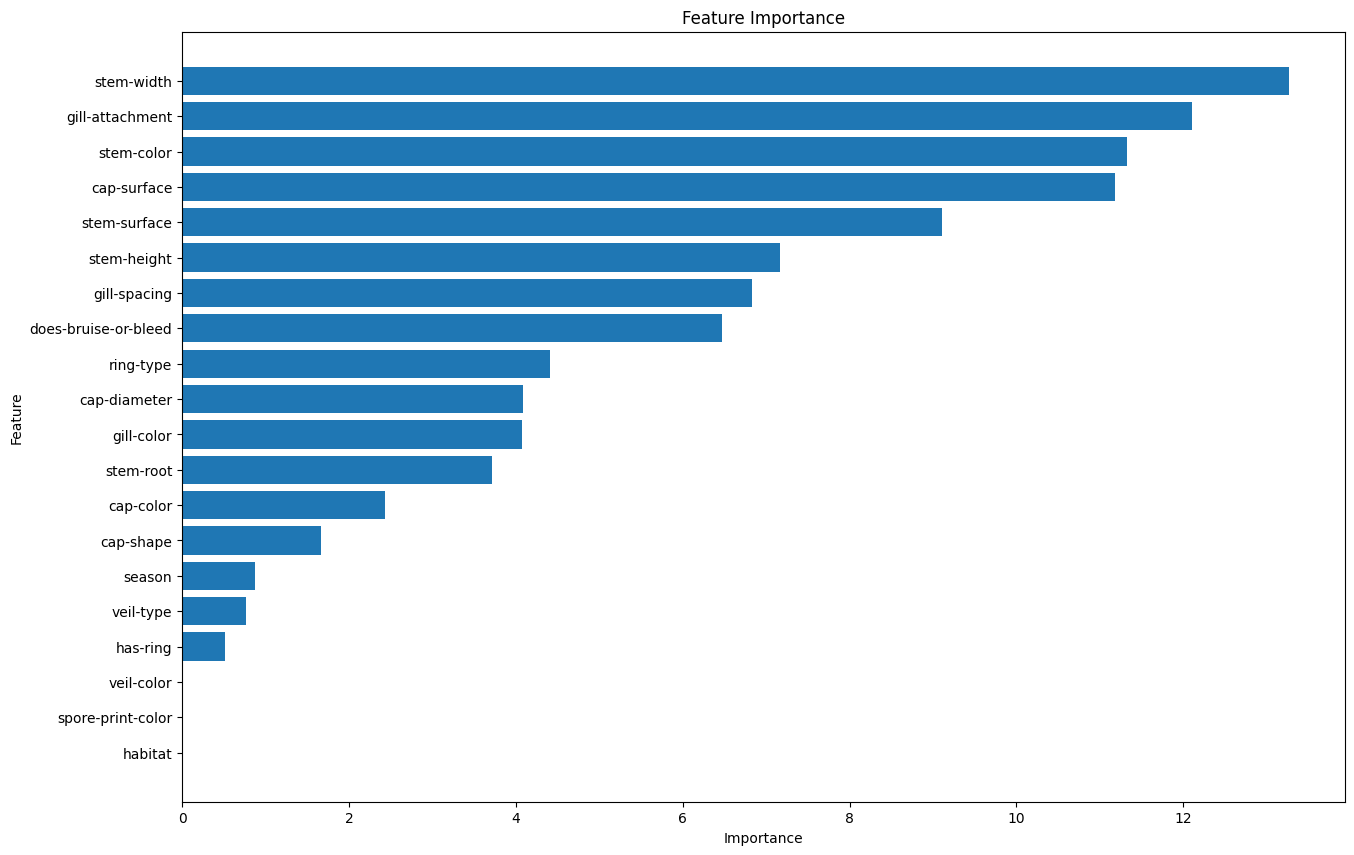

In [ ]:
importance_df = pd.DataFrame({
    'Feature' : feature_names,
    'Importance' : importance
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (15, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df_train.drop(['veil-type', 'veil-color', 'spore-print-color'], axis = 1, inplace = True)
df_train

<ipython-input-119-e5c9fe48cdbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['veil-type', 'veil-color', 'spore-print-color'], axis = 1, inplace = True)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,e,8.8,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,f,f,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,f,f,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,b,NaN,w,t,g,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,NaN,w,f,f,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,NaN,y,t,z,d,a
3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,17.77,NaN,y,w,t,p,d,u


In [ ]:
df_train.drop('habitat', axis = 1, inplace = True)
df_train

<ipython-input-120-cf59b5d70e1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('habitat', axis = 1, inplace = True)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,has-ring,ring-type,season
0,e,8.8,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,f,f,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,t,z,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,f,f,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,f,f,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,f,f,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,b,NaN,w,t,g,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,NaN,w,f,f,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,NaN,y,t,z,a
3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,17.77,NaN,y,w,t,p,u


## Заполнение пропусков MissForest'ом.

In [ ]:
numeric = ['cap-diameter', 'stem-height', 'stem-width']
categorical = []
for col in df_train.columns:
    if col!= 'class' and col not in numeric:
        categorical.append(col)
print(numeric, "\n", categorical)

['cap-diameter', 'stem-height', 'stem-width'] 
 ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'season']


In [ ]:
df_train['ring-type'].fillna(df_train['ring-type'].mode()[0], inplace = True)
df_train['ring-type'].isna().sum()

<ipython-input-136-772967bf1b10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ring-type'].fillna(df_train['ring-type'].mode()[0], inplace = True)


0

In [ ]:
for col in categorical:
    print(col, df_train[col].isna().sum())

cap-shape 40
cap-surface 670229
cap-color 12
does-bruise-or-bleed 8
gill-attachment 523039
gill-spacing 1256520
gill-color 55
stem-root 2753001
stem-surface 1978074
stem-color 37
has-ring 24
ring-type 0
season 0


In [ ]:
lil_propusk = ['cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-color', 'has-ring']
for col in lil_propusk:
    df_train[col].fillna(df_train[col].mode()[0], inplace = True)
    print(col, df_train[col].isna().sum())

<ipython-input-139-67445e030100>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col].fillna(df_train[col].mode()[0], inplace = True)


cap-shape 0
cap-color 0
does-bruise-or-bleed 0
gill-color 0
stem-color 0
has-ring 0


In [ ]:
scaler = StandardScaler()
df_train[numeric] = scaler.fit_transform(df_train[numeric])
df_train

<ipython-input-140-fd6b103d8b63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[numeric] = scaler.fit_transform(df_train[numeric])


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,has-ring,ring-type,season
0,e,0.534797,f,s,u,f,a,c,w,-0.681565,0.523362,NaN,NaN,w,f,f,a
1,p,-0.386276,x,h,o,f,a,c,n,-0.577766,-0.577397,NaN,y,o,t,z,w
2,e,0.135451,f,s,b,f,x,c,w,0.185900,-0.151177,NaN,s,n,f,f,w
3,e,-0.521539,f,y,g,f,s,NaN,g,-0.811315,-0.571220,NaN,NaN,w,f,f,u
4,e,-0.098575,x,l,w,f,d,NaN,w,-1.104177,-0.345138,NaN,NaN,w,f,f,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,0.640001,f,NaN,n,t,NaN,NaN,w,2.146967,0.945876,b,NaN,w,t,g,u
3116941,e,0.981378,s,NaN,w,t,d,c,p,0.111758,1.953978,NaN,NaN,w,f,f,u
3116942,p,0.324389,x,e,e,f,a,NaN,w,1.171994,-0.011575,NaN,NaN,y,t,z,a
3116943,e,0.674354,p,i,n,t,e,NaN,p,1.031124,0.817392,NaN,y,w,t,p,u


In [ ]:
for col in numeric:
    print(col, df_train[col].isna().sum())

cap-diameter 4
stem-height 0
stem-width 0


In [ ]:
df_train['cap-diameter'].fillna(df_train['cap-diameter'].median(), inplace = True)
df_train['cap-diameter'].isna().sum()

<ipython-input-145-4108ac41c8f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cap-diameter'].fillna(df_train['cap-diameter'].median(), inplace = True)


0

In [ ]:
df_temp_train = df_train.drop('class', axis = 1)
df_temp_target = df_train['class']
print(df_temp_train.shape, df_temp_target.shape)

(3111485, 16) (3111485,)


In [ ]:
for col in categorical:
    print(col, df_temp_train[col].unique())

cap-shape ['f' 'x' 'p' 'b' 'o' 'c' 's']
cap-surface ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k']
cap-color ['u' 'o' 'b' 'g' 'w' 'n' 'e' 'y' 'r' 'p' 'k' 'l']
does-bruise-or-bleed ['f' 't']
gill-attachment ['a' 'x' 's' 'd' 'e' nan 'f' 'p']
gill-spacing ['c' nan 'd' 'f']
gill-color ['w' 'n' 'g' 'k' 'y' 'f' 'p' 'o' 'b' 'u' 'e' 'r']
stem-root [nan 'b' 'c' 'r' 's']
stem-surface [nan 'y' 's' 't' 'g' 'h' 'k' 'i']
stem-color ['w' 'o' 'n' 'y' 'e' 'u' 'p' 'g' 'r' 'k' 'l' 'b']
has-ring ['f' 't']
ring-type ['f' 'z' 'e' 'p' 'l' 'g' 'r' 'm']
season ['a' 'w' 'u' 's']


In [ ]:
df_temp_train['does-bruise-or-bleed'].replace({'f' : 0, 't' : 1}, inplace = True)
df_temp_train['has-ring'].replace({'f' : 0, 't' : 1}, inplace = True)
print(df_temp_train['does-bruise-or-bleed'].unique(), "\n", df_temp_train['has-ring'].unique())

[0 1] 
 [0 1]


In [ ]:
def Chooser3(
    a: pd.DataFrame,
    all_cat: List[str] | List[int] | None=None,
    to_fill: List[str] | List[int] | None=None):
    if not to_fill:
      return None, None
    elif isinstance(to_fill[0], int):
      to_fill = a.iloc[:, to_fill].columns.values
    if not all_cat:
      all_cat = a.select_dtypes(include='object').columns.values
    elif isinstance(all_cat[0], int):
      all_cat = a.columns.values[all_cat]
    all_cat = np.unique(np.append(all_cat, a.select_dtypes(include='object').columns.values))
    return all_cat, to_fill

In [ ]:
def MultipleFill(
    a: pd.DataFrame,  #таблица данных
    all_cat: List[str] | List[int] | None=None, #названия/номера категориальных
                                                #признаков (можно указать только те,
                                                #которые являются числовыми (те, что
                                                #имеют тип object выберутся по умолчанию)
    to_fill: List[str] | List[int] | None=None  #названия/номера столбцов для заполнения
) -> pd.DataFrame:
    a = a.copy()
    all_cat, to_fill = Chooser3(a, all_cat, to_fill)
    if all_cat is None or all_cat.size == 0:
        return a
    mf = MissForest()
    filled_data = mf.fit_transform(a, categorical=all_cat)
    a[to_fill] = filled_data[to_fill]
    return a

In [ ]:
df_temp_train = MultipleFill(df_temp_train, categorical,
 ['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface'])

## Подгрузка данных уже обработанных missforest'ом

In [ ]:
df_train = pd.read_csv('new4_res.csv')
df_test = pd.read_csv('test6_res.csv')

In [ ]:
df_train

,Unnamed: 0,class,cap-surface,gill-attachment,gill-spacing,stem-surface,season,habitat,stem-color,has-ring,gill-color,does-bruise-or-bleed,cap-color,cap-shape,ring-type,stem-height,stem-width,cap-diameter
0,0,e,s,a,c,N,a,d,w,f,w,f,u,f,f,4.51,15.39,8.80
1,1,p,h,a,c,y,w,d,o,t,n,f,o,x,z,4.79,6.48,4.51
2,2,e,s,x,c,s,w,l,n,f,w,f,b,f,f,6.85,9.93,6.94
3,3,e,y,s,N,N,u,d,w,f,g,f,g,f,f,4.16,6.53,3.88
4,4,e,l,d,N,N,a,g,w,f,w,f,w,x,f,3.37,8.36,5.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,t,a,N,N,u,d,w,t,w,t,n,f,g,12.14,18.81,9.29
3116941,3116941,e,t,d,c,N,u,d,w,f,p,t,w,s,f,6.65,26.97,10.88
3116942,3116942,p,e,a,N,N,a,d,y,t,w,f,e,x,z,9.51,11.06,7.82
3116943,3116943,e,i,e,N,y,u,d,w,t,p,t,n,p,p,9.13,17.77,9.45


In [ ]:
df_test

,Unnamed: 0,cap-surface,gill-attachment,gill-spacing,stem-surface,season,habitat,stem-color,has-ring,gill-color,does-bruise-or-bleed,cap-color,cap-shape,ring-type,stem-width,cap-diameter,stem-height
0,0,t,a,N,N,a,d,w,t,w,t,n,x,g,17.12,8.64,11.13
1,1,t,a,c,N,a,d,n,f,y,f,o,o,f,10.75,6.90,1.27
2,2,g,a,c,N,s,d,n,f,n,f,n,b,f,3.14,2.00,6.18
3,3,t,s,c,N,u,d,w,t,n,f,n,x,z,8.51,3.47,4.98
4,4,h,p,N,N,u,d,y,t,y,f,y,x,f,13.70,6.17,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,2077959,g,a,d,N,u,d,e,f,w,f,w,x,f,1.35,0.88,2.67
2077960,2077960,s,d,c,N,a,g,w,f,w,f,w,x,f,7.38,3.12,2.69
2077961,2077961,e,a,N,N,a,d,y,t,w,f,e,x,z,9.74,5.73,6.16
2077962,2077962,g,a,d,s,a,d,g,f,g,f,n,b,f,3.46,5.03,6.00


In [ ]:
df_train.drop('Unnamed: 0', axis = 1, inplace = True)
df_test.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df_train

,class,cap-surface,gill-attachment,gill-spacing,stem-surface,season,habitat,stem-color,has-ring,gill-color,does-bruise-or-bleed,cap-color,cap-shape,ring-type,stem-height,stem-width,cap-diameter
0,e,s,a,c,N,a,d,w,f,w,f,u,f,f,4.51,15.39,8.80
1,p,h,a,c,y,w,d,o,t,n,f,o,x,z,4.79,6.48,4.51
2,e,s,x,c,s,w,l,n,f,w,f,b,f,f,6.85,9.93,6.94
3,e,y,s,N,N,u,d,w,f,g,f,g,f,f,4.16,6.53,3.88
4,e,l,d,N,N,a,g,w,f,w,f,w,x,f,3.37,8.36,5.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,t,a,N,N,u,d,w,t,w,t,n,f,g,12.14,18.81,9.29
3116941,e,t,d,c,N,u,d,w,f,p,t,w,s,f,6.65,26.97,10.88
3116942,p,e,a,N,N,a,d,y,t,w,f,e,x,z,9.51,11.06,7.82
3116943,e,i,e,N,y,u,d,w,t,p,t,n,p,p,9.13,17.77,9.45


In [ ]:
df_test

,cap-surface,gill-attachment,gill-spacing,stem-surface,season,habitat,stem-color,has-ring,gill-color,does-bruise-or-bleed,cap-color,cap-shape,ring-type,stem-width,cap-diameter,stem-height
0,t,a,N,N,a,d,w,t,w,t,n,x,g,17.12,8.64,11.13
1,t,a,c,N,a,d,n,f,y,f,o,o,f,10.75,6.90,1.27
2,g,a,c,N,s,d,n,f,n,f,n,b,f,3.14,2.00,6.18
3,t,s,c,N,u,d,w,t,n,f,n,x,z,8.51,3.47,4.98
4,h,p,N,N,u,d,y,t,y,f,y,x,f,13.70,6.17,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,g,a,d,N,u,d,e,f,w,f,w,x,f,1.35,0.88,2.67
2077960,s,d,c,N,a,g,w,f,w,f,w,x,f,7.38,3.12,2.69
2077961,e,a,N,N,a,d,y,t,w,f,e,x,z,9.74,5.73,6.16
2077962,g,a,d,s,a,d,g,f,g,f,n,b,f,3.46,5.03,6.00


In [ ]:
importance_features = ['cap-diameter',	'cap-shape',	'cap-surface',	'cap-color',	'does-bruise-or-bleed',	'gill-attachment',	'gill-spacing',	'gill-color',
                       'stem-height',	'stem-width',	'stem-root',	'stem-surface',	'stem-color',	'has-ring',	'ring-type',	'season']

In [ ]:
target = df_train['class']
df_train.drop('class', axis = 1, inplace = True)
df_train

,cap-surface,gill-attachment,gill-spacing,stem-surface,season,habitat,stem-color,has-ring,gill-color,does-bruise-or-bleed,cap-color,cap-shape,ring-type,stem-height,stem-width,cap-diameter
0,s,a,c,N,a,d,w,f,w,f,u,f,f,4.51,15.39,8.80
1,h,a,c,y,w,d,o,t,n,f,o,x,z,4.79,6.48,4.51
2,s,x,c,s,w,l,n,f,w,f,b,f,f,6.85,9.93,6.94
3,y,s,N,N,u,d,w,f,g,f,g,f,f,4.16,6.53,3.88
4,l,d,N,N,a,g,w,f,w,f,w,x,f,3.37,8.36,5.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,t,a,N,N,u,d,w,t,w,t,n,f,g,12.14,18.81,9.29
3116941,t,d,c,N,u,d,w,f,p,t,w,s,f,6.65,26.97,10.88
3116942,e,a,N,N,a,d,y,t,w,f,e,x,z,9.51,11.06,7.82
3116943,i,e,N,y,u,d,w,t,p,t,n,p,p,9.13,17.77,9.45


In [ ]:
numeric = ['stem-height', 'stem-width', 'cap-diameter']
categorical = []
for col in df_train.columns:
    if col not in numeric:
        categorical.append(col)
categorical

['cap-surface',
 'gill-attachment',
 'gill-spacing',
 'stem-surface',
 'season',
 'habitat',
 'stem-color',
 'has-ring',
 'gill-color',
 'does-bruise-or-bleed',
 'cap-color',
 'cap-shape',
 'ring-type']

In [ ]:
model = CatBoostClassifier(
      iterations = 100,
      learning_rate = 0.05,
      depth = 6,
      loss_function = 'Logloss',
      cat_features = categorical,
      verbose = True
)
model.fit(df_train, target)

importance = model.get_feature_importance()
feature_names = df_train.columns

0:	learn: 0.6837893	total: 2.87s	remaining: 4m 44s
1:	learn: 0.6721678	total: 4.65s	remaining: 3m 47s
2:	learn: 0.6616121	total: 7.03s	remaining: 3m 47s
3:	learn: 0.6520483	total: 10.9s	remaining: 4m 21s
4:	learn: 0.6442256	total: 12.7s	remaining: 4m
5:	learn: 0.6372969	total: 14.4s	remaining: 3m 45s
6:	learn: 0.6295024	total: 16s	remaining: 3m 32s
7:	learn: 0.6224042	total: 17.7s	remaining: 3m 23s
8:	learn: 0.6166532	total: 19.4s	remaining: 3m 15s
9:	learn: 0.6073781	total: 21.1s	remaining: 3m 9s
10:	learn: 0.5988581	total: 23.6s	remaining: 3m 11s
11:	learn: 0.5867871	total: 27.1s	remaining: 3m 18s
12:	learn: 0.5758322	total: 29.3s	remaining: 3m 15s
13:	learn: 0.5658008	total: 31.2s	remaining: 3m 11s
14:	learn: 0.5564348	total: 33.3s	remaining: 3m 8s
15:	learn: 0.5474104	total: 35s	remaining: 3m 3s
16:	learn: 0.5390414	total: 36.7s	remaining: 2m 58s
17:	learn: 0.5315757	total: 39.3s	remaining: 2m 58s
18:	learn: 0.5241825	total: 42.3s	remaining: 3m
19:	learn: 0.5172436	total: 44.5s	rem

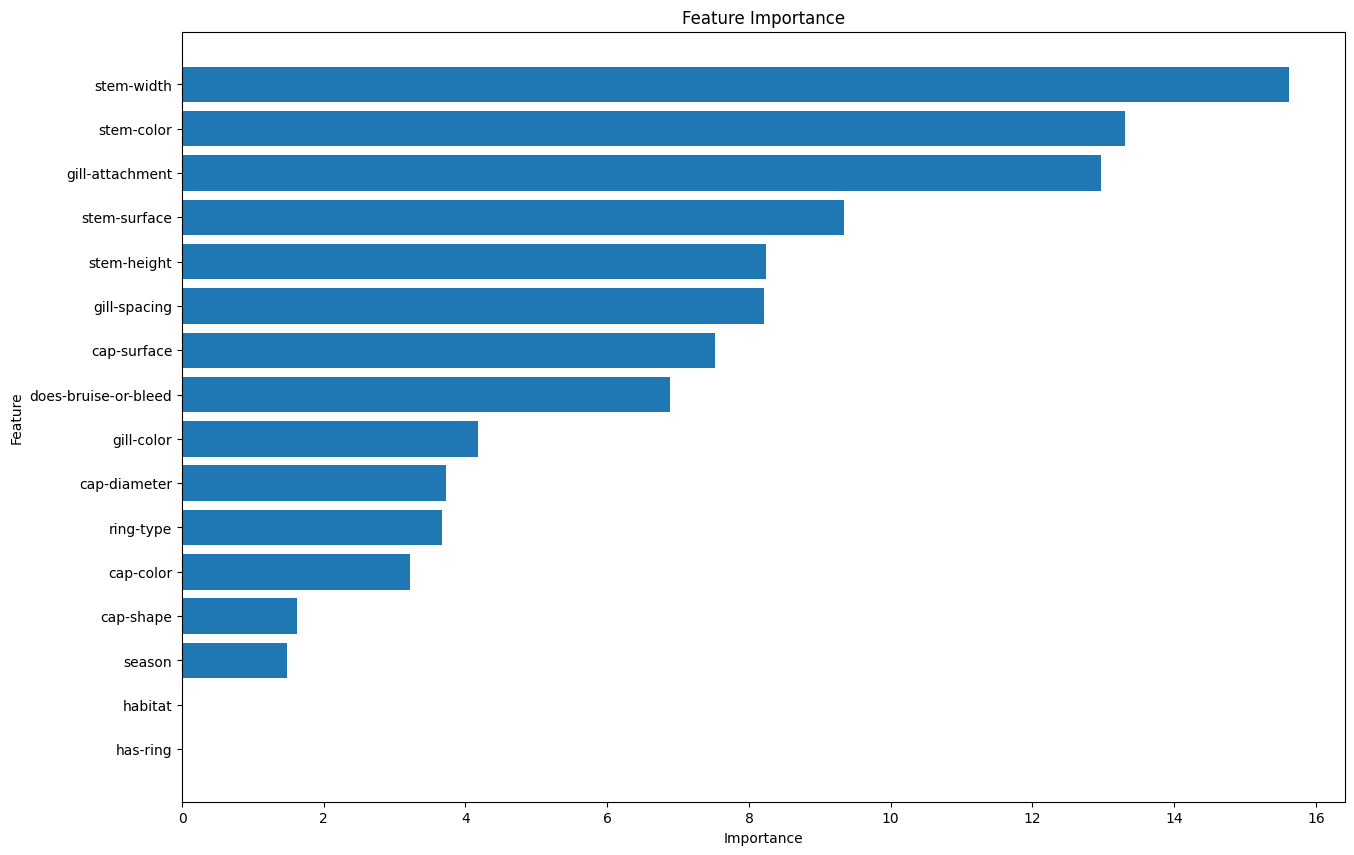

In [ ]:
importance_df = pd.DataFrame({
    'Feature' : feature_names,
    'Importance' : importance
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (15, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df_train.drop(['habitat', 'has-ring'], axis = 1, inplace = True)
df_test.drop(['habitat', 'has-ring'], axis = 1, inplace = True)

In [ ]:
df_train

,cap-surface,gill-attachment,gill-spacing,stem-surface,season,stem-color,gill-color,does-bruise-or-bleed,cap-color,cap-shape,ring-type,stem-height,stem-width,cap-diameter
0,s,a,c,N,a,w,w,f,u,f,f,4.51,15.39,8.80
1,h,a,c,y,w,o,n,f,o,x,z,4.79,6.48,4.51
2,s,x,c,s,w,n,w,f,b,f,f,6.85,9.93,6.94
3,y,s,N,N,u,w,g,f,g,f,f,4.16,6.53,3.88
4,l,d,N,N,a,w,w,f,w,x,f,3.37,8.36,5.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,t,a,N,N,u,w,w,t,n,f,g,12.14,18.81,9.29
3116941,t,d,c,N,u,w,p,t,w,s,f,6.65,26.97,10.88
3116942,e,a,N,N,a,y,w,f,e,x,z,9.51,11.06,7.82
3116943,i,e,N,y,u,w,p,t,n,p,p,9.13,17.77,9.45


In [ ]:
df_test

,cap-surface,gill-attachment,gill-spacing,stem-surface,season,stem-color,gill-color,does-bruise-or-bleed,cap-color,cap-shape,ring-type,stem-width,cap-diameter,stem-height
0,t,a,N,N,a,w,w,t,n,x,g,17.12,8.64,11.13
1,t,a,c,N,a,n,y,f,o,o,f,10.75,6.90,1.27
2,g,a,c,N,s,n,n,f,n,b,f,3.14,2.00,6.18
3,t,s,c,N,u,w,n,f,n,x,z,8.51,3.47,4.98
4,h,p,N,N,u,y,y,f,y,x,f,13.70,6.17,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,g,a,d,N,u,e,w,f,w,x,f,1.35,0.88,2.67
2077960,s,d,c,N,a,w,w,f,w,x,f,7.38,3.12,2.69
2077961,e,a,N,N,a,y,w,f,e,x,z,9.74,5.73,6.16
2077962,g,a,d,s,a,g,g,f,n,b,f,3.46,5.03,6.00


In [ ]:
scaler = StandardScaler()
df_train[numeric] = scaler.fit_transform(df_train[numeric])
df_test[numeric] = scaler.fit_transform(df_test[numeric])

In [ ]:
df_train

,cap-surface,gill-attachment,gill-spacing,stem-surface,season,stem-color,gill-color,does-bruise-or-bleed,cap-color,cap-shape,ring-type,stem-height,stem-width,cap-diameter
0,s,a,c,N,a,w,w,f,u,f,f,-0.680926,0.523282,0.534605
1,h,a,c,y,w,o,n,f,o,x,z,-0.577213,-0.577333,-0.386405
2,s,x,c,s,w,n,w,f,b,f,f,0.185819,-0.151169,0.135286
3,y,s,N,N,u,w,g,f,g,f,f,-0.810568,-0.571157,-0.521659
4,l,d,N,N,a,w,w,f,w,x,f,-1.103187,-0.345105,-0.098724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,t,a,N,N,u,w,w,t,n,f,g,2.145257,0.945740,0.639802
3116941,t,d,c,N,u,w,p,t,w,s,f,0.111739,1.953710,0.981156
3116942,e,a,N,N,a,y,w,f,e,x,z,1.171094,-0.011585,0.324211
3116943,i,e,N,y,u,w,p,t,n,p,p,1.030341,0.817273,0.674152


In [ ]:
df_test

,cap-surface,gill-attachment,gill-spacing,stem-surface,season,stem-color,gill-color,does-bruise-or-bleed,cap-color,cap-shape,ring-type,stem-width,cap-diameter,stem-height
0,t,a,N,N,a,w,w,t,n,x,g,0.737221,0.498096,1.772335
1,t,a,c,N,a,n,y,f,o,o,f,-0.049181,0.126734,-1.880902
2,g,a,c,N,s,n,n,f,n,b,f,-0.988666,-0.919056,-0.061693
3,t,s,c,N,u,w,n,f,n,x,z,-0.325718,-0.605319,-0.506306
4,h,p,N,N,u,y,y,f,y,x,f,0.315009,-0.029067,0.142087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,g,a,d,N,u,e,w,f,w,x,f,-1.209649,-1.158093,-1.362186
2077960,s,d,c,N,a,w,w,f,w,x,f,-0.465221,-0.680018,-1.354776
2077961,e,a,N,N,a,y,w,f,e,x,z,-0.173869,-0.122975,-0.069104
2077962,g,a,d,s,a,g,g,f,n,b,f,-0.949161,-0.272373,-0.128385


In [ ]:
categorical.remove('habitat')
categorical.remove('has-ring')
for col in categorical:
    print(col, df_train[col].unique(), df_test[col].unique())

cap-surface ['s' 'h' 'y' 'l' 't' 'e' 'g' 'd' 'i' 'w' 'k' 'other'] ['t' 'g' 'h' 'd' 'e' 'y' 'k' 's' 'i' 'l' 'w' 'other']
gill-attachment ['a' 'x' 's' 'd' 'e' 'f' 'p' 'other'] ['a' 's' 'p' 'x' 'f' 'd' 'e' 'other']
gill-spacing ['c' 'N' 'd' 'f' 'other'] ['N' 'c' 'f' 'd' 'other']
stem-surface ['N' 'y' 's' 't' 'g' 'h' 'k' 'i' 'other'] ['N' 's' 'g' 'y' 't' 'i' 'k' 'h' 'other']
season ['a' 'w' 'u' 's'] ['a' 's' 'u' 'w']
stem-color ['w' 'o' 'n' 'y' 'e' 'u' 'p' 'other' 'g' 'r' 'k' 'l' 'b'] ['w' 'n' 'y' 'g' 'o' 'p' 'u' 'e' 'k' 'r' 'l' 'b' 'other']
gill-color ['w' 'n' 'g' 'k' 'y' 'f' 'p' 'o' 'b' 'u' 'e' 'r' 'other'] ['w' 'y' 'n' 'e' 'f' 'b' 'g' 'p' 'o' 'u' 'k' 'r' 'other']
does-bruise-or-bleed ['f' 't' 'other'] ['t' 'f' 'other']
cap-color ['u' 'o' 'b' 'g' 'w' 'n' 'e' 'y' 'r' 'p' 'k' 'l' 'other'] ['n' 'o' 'y' 'k' 'b' 'w' 'e' 'g' 'p' 'u' 'l' 'r' 'other']
cap-shape ['f' 'x' 'p' 'b' 'o' 'c' 's' 'other'] ['x' 'o' 'b' 'f' 's' 'p' 'c' 'other']
ring-type ['f' 'z' 'e' 'p' 'l' 'g' 'r' 'm' 'other'] ['g' 'f'

In [ ]:
df_train.to_csv('train_after_miss_for_plus_imp.csv')
df_test.to_csv('test_after_miss_for_plus_imp.csv')

In [ ]:
df_encoded = pd.get_dummies(df_train, columns=categorical, drop_first = True)
df_encoded

,stem-height,stem-width,cap-diameter,cap-surface_e,cap-surface_g,cap-surface_h,cap-surface_i,cap-surface_k,cap-surface_l,cap-surface_other,...,cap-shape_s,cap-shape_x,ring-type_f,ring-type_g,ring-type_l,ring-type_m,ring-type_other,ring-type_p,ring-type_r,ring-type_z
0,-0.680926,0.523282,0.534605,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,-0.577213,-0.577333,-0.386405,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,0.185819,-0.151169,0.135286,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,-0.810568,-0.571157,-0.521659,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,-1.103187,-0.345105,-0.098724,False,False,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,2.145257,0.945740,0.639802,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3116941,0.111739,1.953710,0.981156,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
3116942,1.171094,-0.011585,0.324211,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3116943,1.030341,0.817273,0.674152,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_train_enc = df_encoded
df_test_enc = pd.get_dummies(df_test, columns = categorical, drop_first = True)
df_test_enc

,stem-width,cap-diameter,stem-height,cap-surface_e,cap-surface_g,cap-surface_h,cap-surface_i,cap-surface_k,cap-surface_l,cap-surface_other,...,cap-shape_s,cap-shape_x,ring-type_f,ring-type_g,ring-type_l,ring-type_m,ring-type_other,ring-type_p,ring-type_r,ring-type_z
0,0.737221,0.498096,1.772335,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,-0.049181,0.126734,-1.880902,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,-0.988666,-0.919056,-0.061693,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,-0.325718,-0.605319,-0.506306,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,0.315009,-0.029067,0.142087,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,-1.209649,-1.158093,-1.362186,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2077960,-0.465221,-0.680018,-1.354776,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2077961,-0.173869,-0.122975,-0.069104,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2077962,-0.949161,-0.272373,-0.128385,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train_enc, target, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape, y_train.shape)

(2181861, 89) (2181861,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators = 89, random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           e       0.99      0.99      0.99    423456
           p       0.99      0.99      0.99    511628

    accuracy                           0.99    935084
   macro avg       0.99      0.99      0.99    935084
weighted avg       0.99      0.99      0.99    935084



In [ ]:
order = df_train_enc.columns
order

Index(['stem-height', 'stem-width', 'cap-diameter', 'cap-surface_e',
       'cap-surface_g', 'cap-surface_h', 'cap-surface_i', 'cap-surface_k',
       'cap-surface_l', 'cap-surface_other', 'cap-surface_s', 'cap-surface_t',
       'cap-surface_w', 'cap-surface_y', 'gill-attachment_d',
       'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_other',
       'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x',
       'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f',
       'gill-spacing_other', 'stem-surface_g', 'stem-surface_h',
       'stem-surface_i', 'stem-surface_k', 'stem-surface_other',
       'stem-surface_s', 'stem-surface_t', 'stem-surface_y', 'season_s',
       'season_u', 'season_w', 'stem-color_e', 'stem-color_g', 'stem-color_k',
       'stem-color_l', 'stem-color_n', 'stem-color_o', 'stem-color_other',
       'stem-color_p', 'stem-color_r', 'stem-color_u', 'stem-color_w',
       'stem-color_y', 'gill-color_e', 'gill-color_f', 'gill-color_g',
       'gil

In [ ]:
df_test_enc = df_test_enc[order]
df_test_enc

,stem-height,stem-width,cap-diameter,cap-surface_e,cap-surface_g,cap-surface_h,cap-surface_i,cap-surface_k,cap-surface_l,cap-surface_other,...,cap-shape_s,cap-shape_x,ring-type_f,ring-type_g,ring-type_l,ring-type_m,ring-type_other,ring-type_p,ring-type_r,ring-type_z
0,1.772335,0.737221,0.498096,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,-1.880902,-0.049181,0.126734,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,-0.061693,-0.988666,-0.919056,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,-0.506306,-0.325718,-0.605319,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,0.142087,0.315009,-0.029067,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,-1.362186,-1.209649,-1.158093,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2077960,-1.354776,-0.465221,-0.680018,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2077961,-0.069104,-0.173869,-0.122975,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2077962,-0.128385,-0.949161,-0.272373,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
test_pred = model.predict(df_test_enc)

In [ ]:
test_pred

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [ ]:
submit = pd.read_csv('sample_submission.csv')

In [ ]:
submit

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e
...,...,...
2077959,5194904,e
2077960,5194905,e
2077961,5194906,e
2077962,5194907,e


In [ ]:
submit.drop('class', axis = 1, inplace = True)
submit

,id
0,3116945
1,3116946
2,3116947
3,3116948
4,3116949
...,...
2077959,5194904
2077960,5194905
2077961,5194906
2077962,5194907


In [ ]:
submit['class'] = test_pred

In [ ]:
submit

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [ ]:
submit.to_csv('v_1.csv')

In [ ]:
submit

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [ ]:
submit.drop('id', axis = 1, inplace = True)
submit

,class
0,e
1,p
2,p
3,p
4,e
...,...
2077959,p
2077960,p
2077961,p
2077962,e


In [ ]:
submit.to_csv('v_1.csv')

In [ ]:
submit = pd.read_csv('sample_submission.csv')
submit

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e
...,...,...
2077959,5194904,e
2077960,5194905,e
2077961,5194906,e
2077962,5194907,e


In [ ]:
submit['class'] = test_pred
submit

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [ ]:
submit.to_csv('v_1.csv', index = False)

In [ ]:
df_train_enc

,stem-height,stem-width,cap-diameter,cap-surface_e,cap-surface_g,cap-surface_h,cap-surface_i,cap-surface_k,cap-surface_l,cap-surface_other,...,cap-shape_s,cap-shape_x,ring-type_f,ring-type_g,ring-type_l,ring-type_m,ring-type_other,ring-type_p,ring-type_r,ring-type_z
0,-0.680926,0.523282,0.534605,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,-0.577213,-0.577333,-0.386405,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,0.185819,-0.151169,0.135286,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,-0.810568,-0.571157,-0.521659,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,-1.103187,-0.345105,-0.098724,False,False,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,2.145257,0.945740,0.639802,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3116941,0.111739,1.953710,0.981156,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
3116942,1.171094,-0.011585,0.324211,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3116943,1.030341,0.817273,0.674152,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_test_enc

,stem-height,stem-width,cap-diameter,cap-surface_e,cap-surface_g,cap-surface_h,cap-surface_i,cap-surface_k,cap-surface_l,cap-surface_other,...,cap-shape_s,cap-shape_x,ring-type_f,ring-type_g,ring-type_l,ring-type_m,ring-type_other,ring-type_p,ring-type_r,ring-type_z
0,1.772335,0.737221,0.498096,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,-1.880902,-0.049181,0.126734,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,-0.061693,-0.988666,-0.919056,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,-0.506306,-0.325718,-0.605319,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,0.142087,0.315009,-0.029067,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,-1.362186,-1.209649,-1.158093,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2077960,-1.354776,-0.465221,-0.680018,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2077961,-0.069104,-0.173869,-0.122975,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2077962,-0.128385,-0.949161,-0.272373,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
df_train_enc.to_csv('missfor_enc_train.csv')

In [ ]:
df_test_enc.to_csv('missfor_enc_test.csv')